### 군집(Clustering)
- 데이터셋의 관측값이 갖고 있는 여러 속성을 분석
- 서로 비슷한 특징을 갖는 관측값끼리 같은 cluster(집단)으로 묶는 알고리즘
- 클러스터 간에는 서로 완전 구분되는 특징을 가짐 
- 그렇기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재

### k-Means 
- 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리 이용
- 벡터 공간에 위치한 어떤 데이터에 대해 k개의 클러스터가 주어진다.
- 그 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당
- k가 클수록 모형의 정확도는 개선되지만, 너무 커지면 분석의 효과가 사라짐(선택지가 많아짐)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0) 

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- 데이터프레임 전체를 학습 데이터로 사용
- 비지도 학습 모형이라 예측 변수를 지정할 필요가 없고 속성을 전부 변수로 활용

In [6]:
X = df.iloc[:, :]
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)

X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

### 모델 학습 및 검증
- sklearn 라이브러리의 cluster 모듈 사용
- KMeans() 함수로 모델 객체 생성
- n_clusters 옵션으로 클러스터 개수 지정 
- 모델의 labels_ 속성에 구분한 클러스터 값이 입력 

In [9]:
from sklearn import cluster 

kmeans = cluster.KMeans(init = 'k-means++', n_clusters = 5, n_init = 10)

kmeans.fit(X)

cluster_label = kmeans.labels_ 
cluster_label

array([4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0,
       0, 1, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4,
       4, 4, 4, 3, 4, 4, 0, 0, 4, 4, 0, 0, 3, 4, 0, 0, 4, 3, 4, 4, 0, 3,
       0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 3, 3, 1,
       0, 0, 0, 0, 3, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 2, 4, 4, 2, 4,

In [10]:
df['Cluster'] = cluster_label 
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


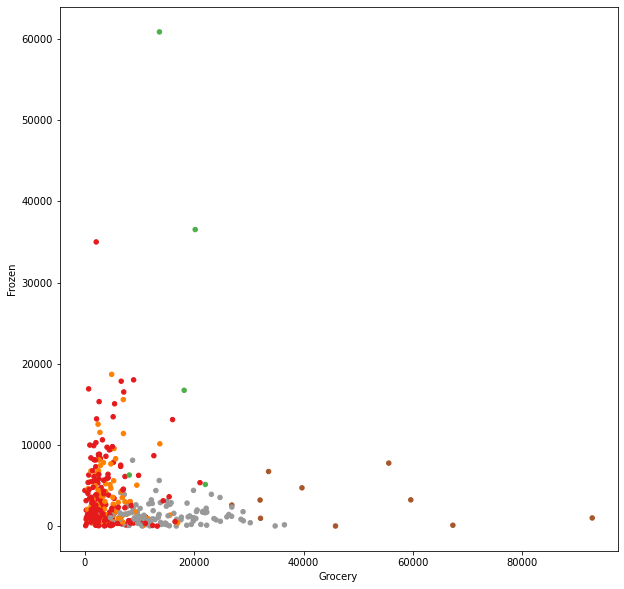

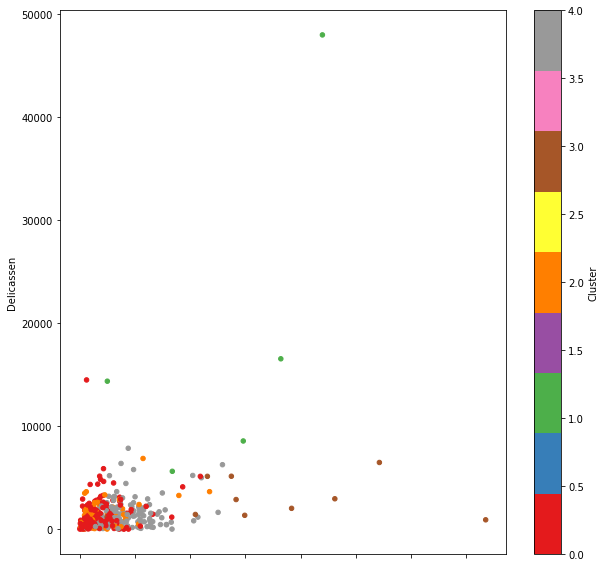

In [12]:
df.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1',
        colorbar = False, figsize = (10,10))

df.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c= 'Cluster', cmap = 'Set1', 
        colorbar = True, figsize = (10,10))

plt.show()
plt.close()

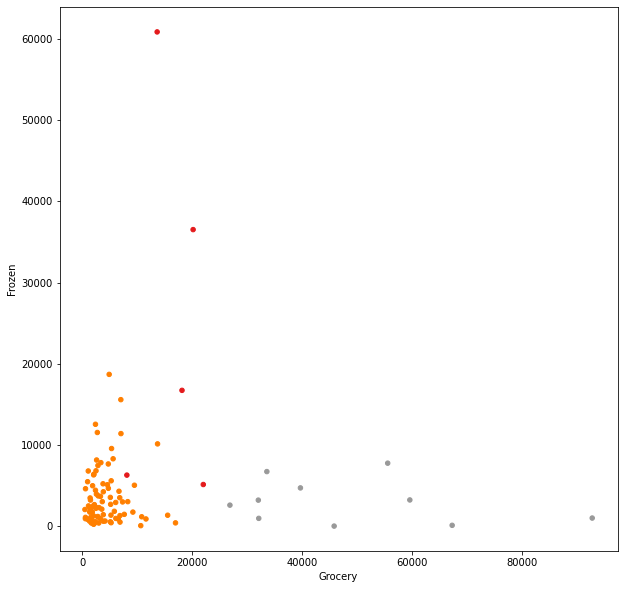

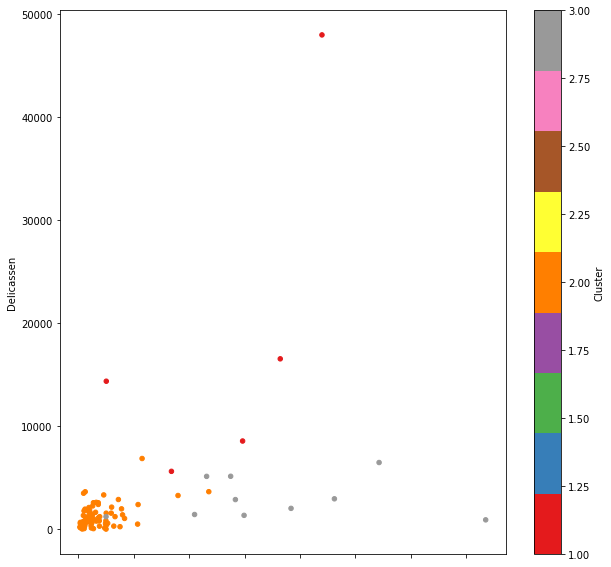

In [14]:
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind = 'scatter',  x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1',
        colorbar = False, figsize = (10, 10))
ndf.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1',
        colorbar = True, figsize = (10,10))

plt.show()
plt.close()